In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
non_transformed_features = joblib.load('../work/data/non_transformed_features')
transformed_features = joblib.load('../work/data/transformed_features')
logged_features = joblib.load('../work/data/logged_features')
target = joblib.load('../work/data/target')

### Boxplots

In [15]:
logged_features.columns

Index(['Dayofweek_0', 'Dayofweek_1', 'Dayofweek_2', 'Dayofweek_3',
       'Dayofweek_4', 'Dayofweek_5', 'Dayofweek_6', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute7', 'attribute8', 'attribute9',
       'attribute1', 'attribute6', 'failure'],
      dtype='object')

In [37]:
eda_logged_features = logged_features[logged_features.columns[~logged_features.columns.isin(['Dayofweek_0', 'Dayofweek_1', 'Dayofweek_2', 'Dayofweek_3',
       'Dayofweek_4', 'Dayofweek_5', 'Dayofweek_6'])]]

In [39]:
eda_logged_features.head(2)

,attribute2,attribute3,attribute4,attribute5,attribute7,attribute8,attribute9,attribute1,attribute6,failure
0,4.043051,0.000000,3.970292,1.94591,0.0,0.0,2.079442,215630672,407438,0
1,0.000000,1.386294,0.000000,1.94591,0.0,0.0,0.000000,61370680,403174,0


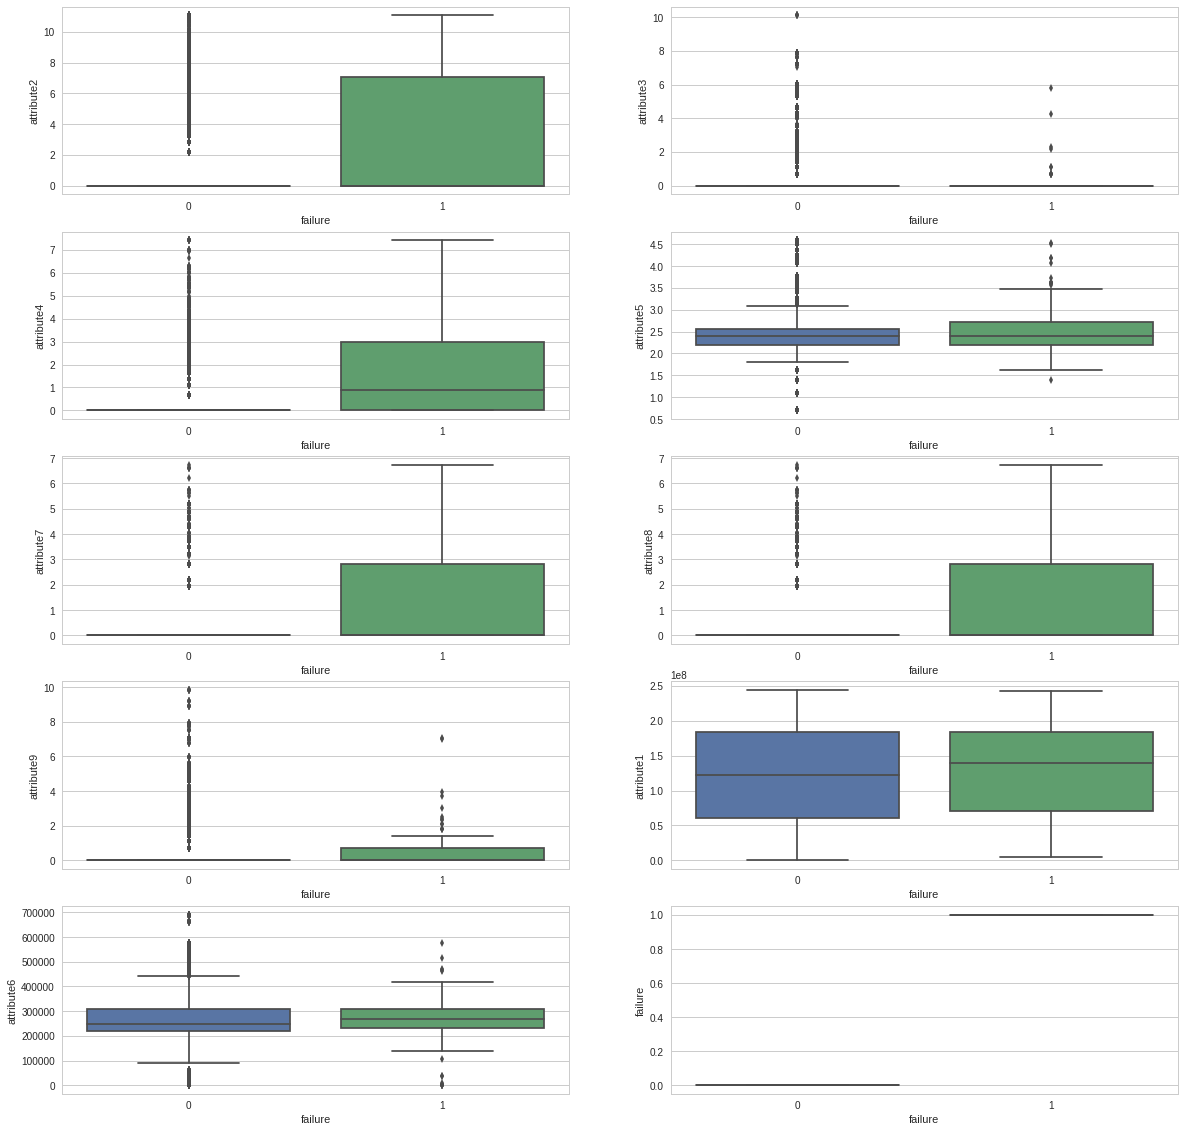

In [41]:
# The ones with the greatest discrepancy in distribution signal 
# their importance for failure prediction

fig = plt.figure(figsize=(20,20))

for i, col in enumerate(eda_logged_features.columns):
    fig.add_subplot(5,2,1+i)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=target, y=eda_logged_features[col])

ValueError: num must be 1 <= num <= 10, not 11

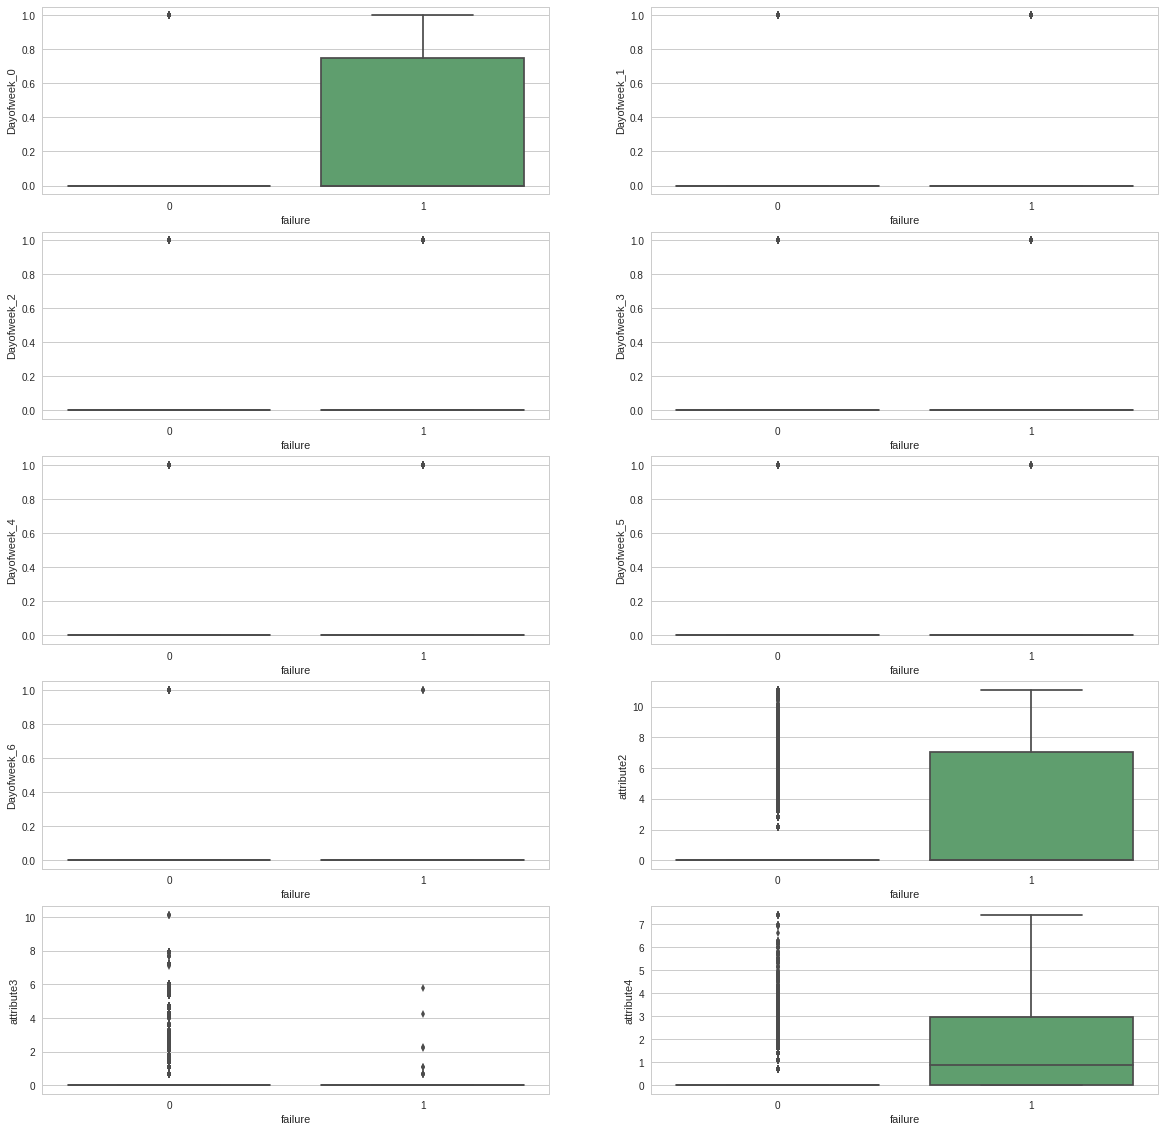

In [42]:
# The ones with the greatest discrepancy in distribution signal 
# their importance for failure prediction

fig = plt.figure(figsize=(20,20))

for i, col in enumerate(logged_features.columns):
    fig.add_subplot(5,2,1+i)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=target, y=logged_features[col])

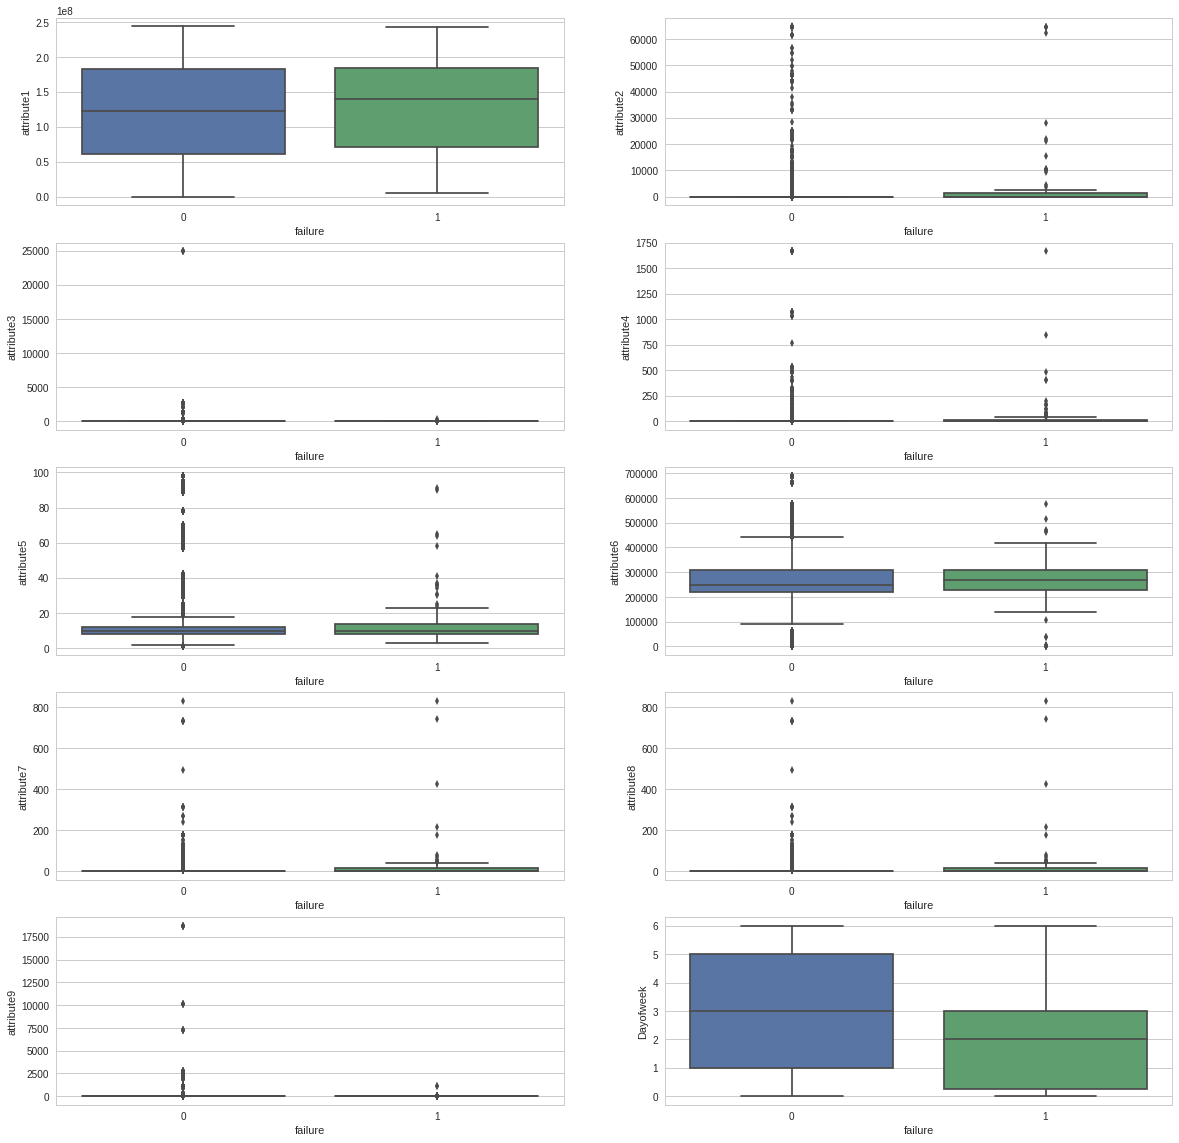

In [71]:
# The ones with the greatest discrepancy in distribution signal 
# their importance for failure prediction

fig = plt.figure(figsize=(20,20))

for i, col in enumerate(logged_features.columns):
    fig.add_subplot(5,2,1+i)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=target, y=logged_features[col])

### Correlation matrix

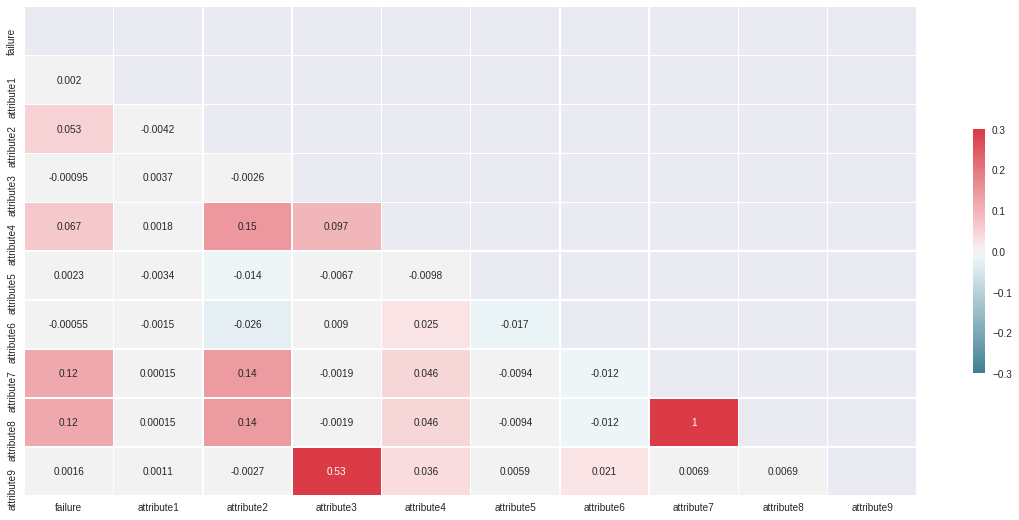

In [6]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
            annot=True)

### Scatter plot

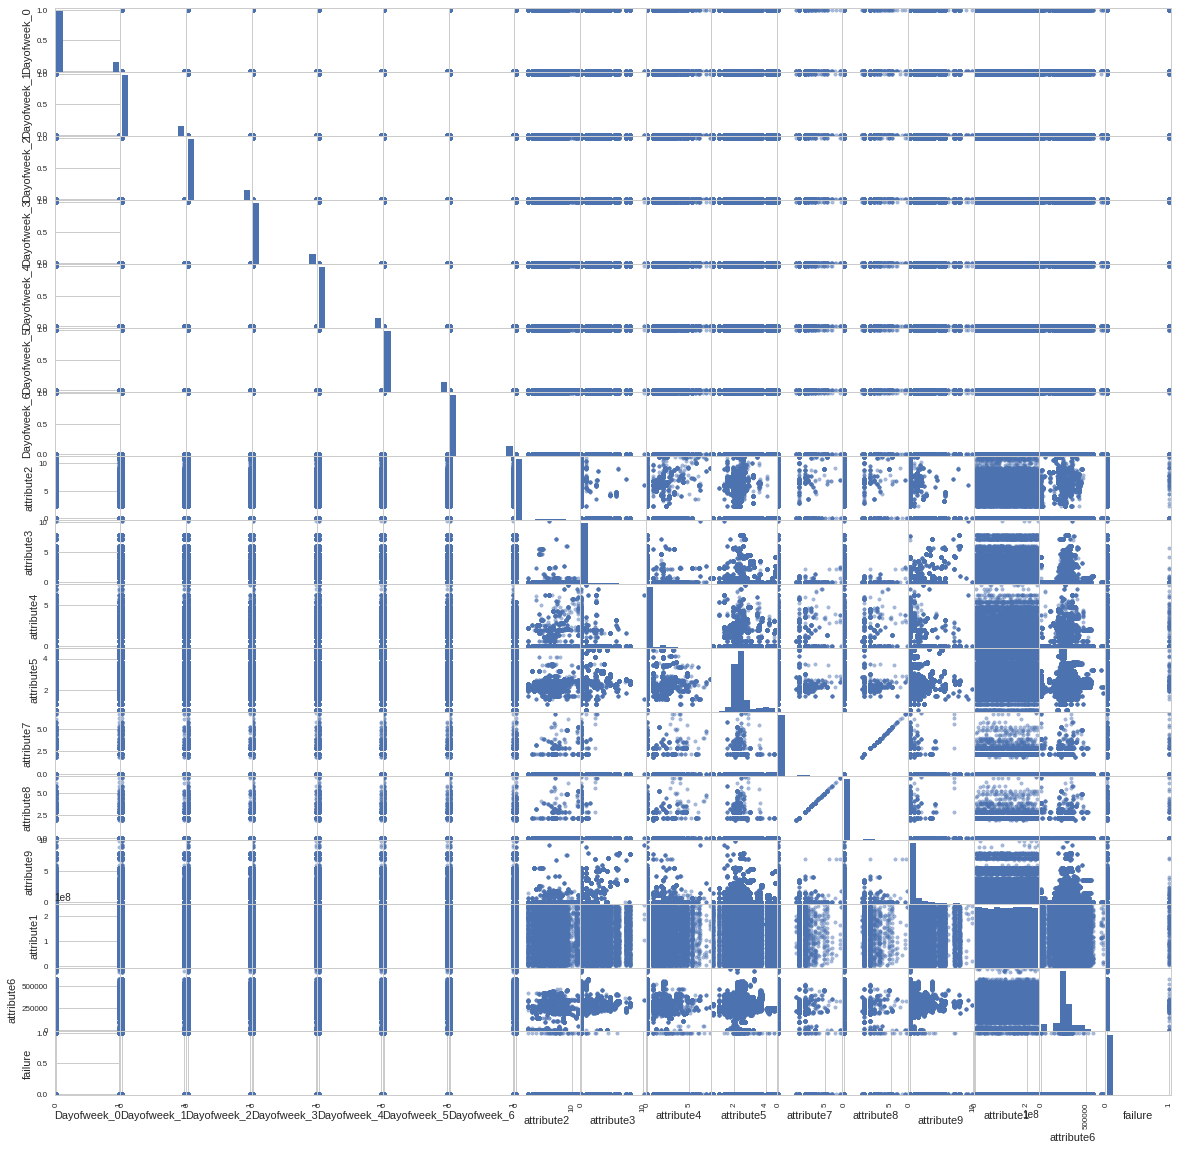

In [14]:
pd.scatter_matrix(logged_features, alpha=.5, figsize=(20,20))
plt.show()

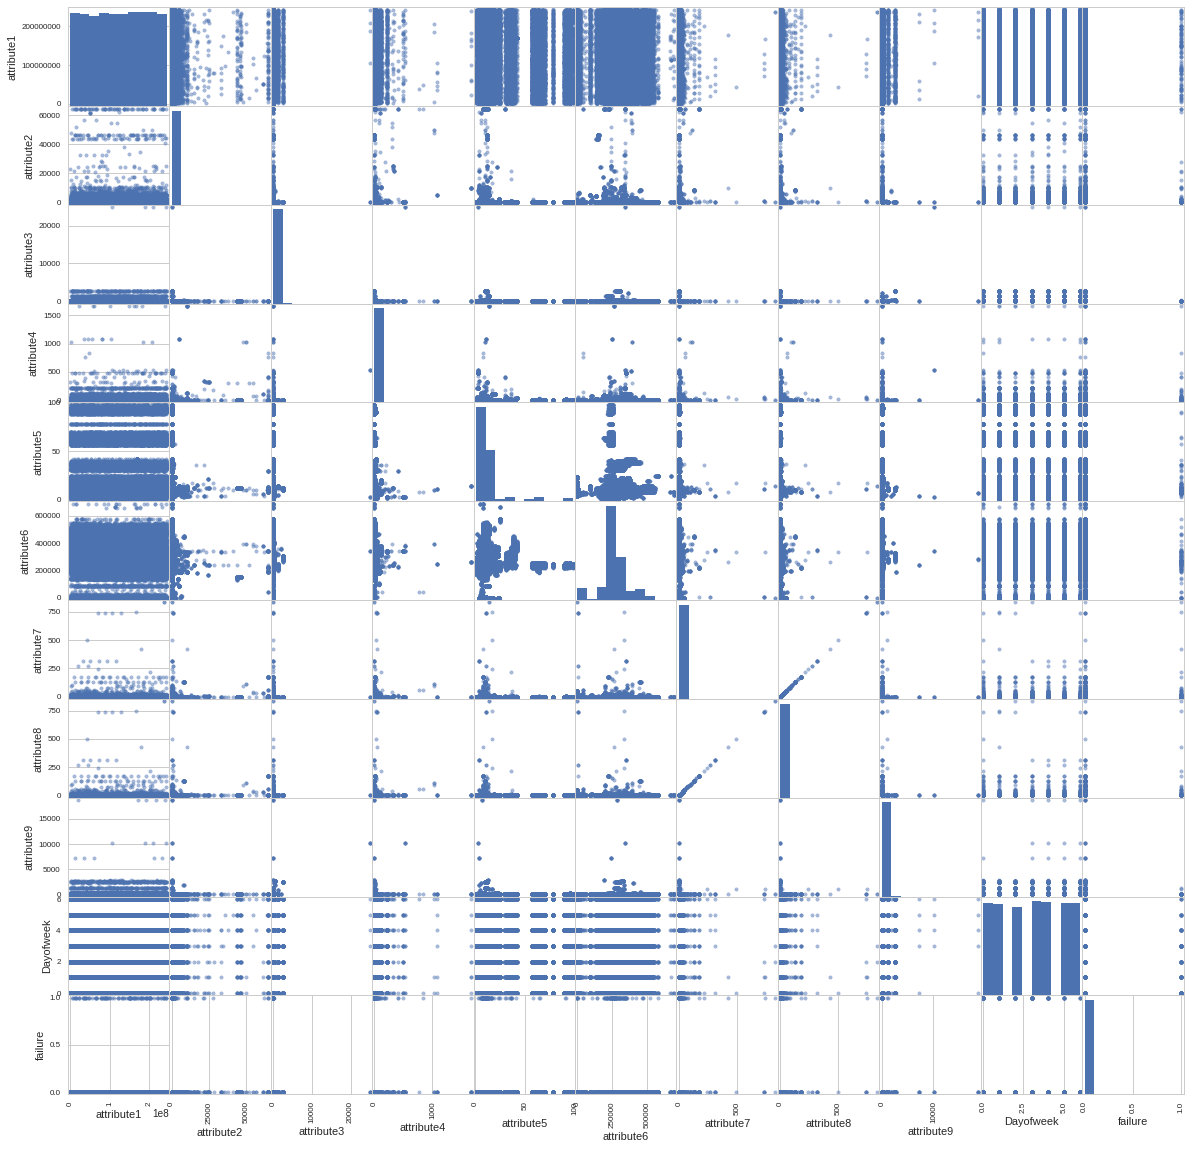

In [115]:
pd.scatter_matrix(non_transformed_data, alpha=.5, figsize=(20,20))
plt.show()

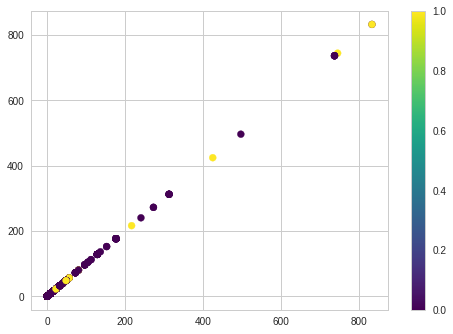

In [118]:
# attribute 7 & 8 are highly correlated, let's take a look

plt.scatter(non_transformed_features['attribute7'], non_transformed_features['attribute8'], c=target, cmap='viridis')
plt.colorbar()

## Feature Selection

### Use Random Forest to find important features
Random Forest randomly generates a bunch of decision trees and takes turns leaving out each varibale in fitting the model. This way, you can calsulcate how much better or worse a model does when you leave one variable out. 

In [25]:
features = non_transformed_features.columns.values

rfc = RandomForestClassifier()
rfc.fit(non_transformed_features, target)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), features), reverse=True))

Features sorted by their score:
[(0.29409999999999997, 'attribute1'), (0.23549999999999999, 'attribute6'), (0.1167, 'attribute2'), (0.099000000000000005, 'attribute4'), (0.0809, 'attribute5'), (0.0717, 'Dayofweek'), (0.035000000000000003, 'attribute8'), (0.032599999999999997, 'attribute7'), (0.028400000000000002, 'attribute9'), (0.0061999999999999998, 'attribute3')]


## PCA
Use the first two principal components to visualize the data

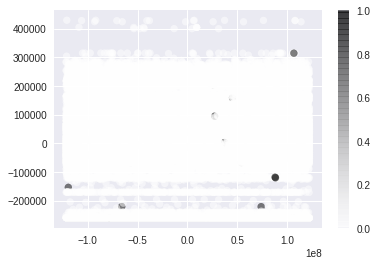

In [33]:
# Try PCA on non-transformed data 

pca = PCA()
features_pca = pca.fit_transform(non_transformed_features)
plt.scatter(features_pca[:,0], features_pca[:,1], c=target, alpha=.5)
plt.colorbar()

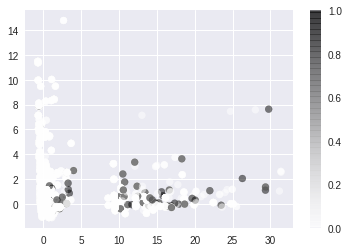

In [35]:
# Try PCA on transformed data

pca = PCA()
pca_features = pca.fit_transform(transformed_features)
plt.scatter(pca_features[:,0], pca_features[:,1], c=target, alpha=.5)
plt.colorbar()

In [36]:
pca.explained_variance_ratio_[:5]

array([ 0.13258631,  0.10384451,  0.07315312,  0.07306768,  0.07299079])

In [37]:
# 11 components can account for 90% of the variance

np.where(np.cumsum(pca.explained_variance_ratio_) > .9)[0][0]

11

In [38]:
len(pca.explained_variance_ratio_)

16

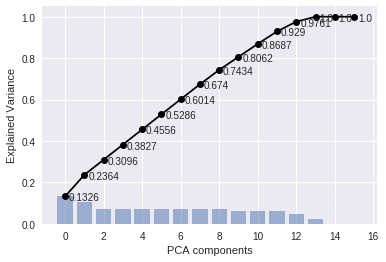

In [39]:
# create an x-axis variable for each pca component
x = np.arange(16)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

In [50]:
non_transformed_features.columns

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9', 'Dayofweek'],
      dtype='object')